## **SENTIMENT ANALYSIS**

**INSTRUCTIONS:** PERFORM SENTIMENT ANALYSIS ON TEXTUAL DATA (E.G., TWEETS, REVIEWS) USING NATURAL LANGUAGE PROCESSING (NLP) TECHNIQUES.

1 — Install Dependencies

In [ ]:
!pip install pandas numpy scikit-learn matplotlib seaborn nltk --quiet

import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

2 — Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

3 — Load Dataset

In [ ]:
# Upload using left panel or mount Drive
file_path = "/content/Twitter_Data.csv"
df = pd.read_csv(file_path)

df.head()

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


4 — Data Overview

In [ ]:
print(df.shape)

(115008, 2)


In [ ]:
print(df.shape)

(115008, 2)


In [ ]:
print(df.isnull().sum())

clean_text    1
category      1
dtype: int64


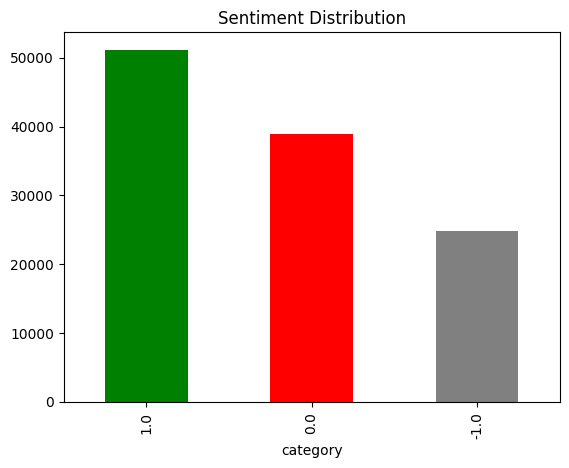

In [ ]:
df['category'].value_counts().plot(kind='bar', color=['green', 'red', 'gray'])
plt.title("Sentiment Distribution")
plt.show()

5 — Text Cleaning & Preprocessing

In [ ]:
stop_words = set(stopwords.words('english'))
lm = WordNetLemmatizer()

def clean_text(text):
    text = str(text)
    text = re.sub(r"http\\S+|www\\S+","", text)  # remove urls
    text = re.sub(r"[^A-Za-z ]","", text)       # keep alphabets only
    text = text.lower()
    words = nltk.word_tokenize(text)
    words = [lm.lemmatize(w) for w in words if w not in stop_words]
    return " ".join(words)

df['clean_text'] = df['clean_text'].apply(clean_text)
df.dropna(inplace=True) # Drop rows with any NaN values
df[['clean_text', 'category']].head()

,clean_text,category
0,modi promised minimum government maximum gover...,-1.0
1,talk nonsense continue drama vote modi,0.0
2,say vote modi welcome bjp told rahul main camp...,1.0
3,asking supporter prefix chowkidar name modi gr...,1.0
4,answer among powerful world leader today trump...,1.0


6 — Feature Extraction (TF-IDF)

In [ ]:
X = df['clean_text']
y = df['category']

vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1,2))
X_tfidf = vectorizer.fit_transform(X)

7 — Train–Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_tfidf, y, test_size=0.2, random_state=42
)

8 — Logistic Regression Model

In [ ]:
log_model = LogisticRegression(max_iter=400)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

print("Logistic Regression Results")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))

Logistic Regression Results
Accuracy: 0.8681853751847666
              precision    recall  f1-score   support

        -1.0       0.85      0.73      0.79      4951
         0.0       0.84      0.95      0.89      7796
         1.0       0.90      0.87      0.89     10255

    accuracy                           0.87     23002
   macro avg       0.86      0.85      0.85     23002
weighted avg       0.87      0.87      0.87     23002



9 — Naive Bayes Model

In [ ]:
nb = MultinomialNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)

print("Naive Bayes Results")
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))

Naive Bayes Results
Accuracy: 0.7279367011564212
              precision    recall  f1-score   support

        -1.0       0.82      0.47      0.60      4951
         0.0       0.79      0.68      0.73      7796
         1.0       0.68      0.89      0.77     10255

    accuracy                           0.73     23002
   macro avg       0.76      0.68      0.70     23002
weighted avg       0.75      0.73      0.72     23002



10 — Confusion Matrix Visualization

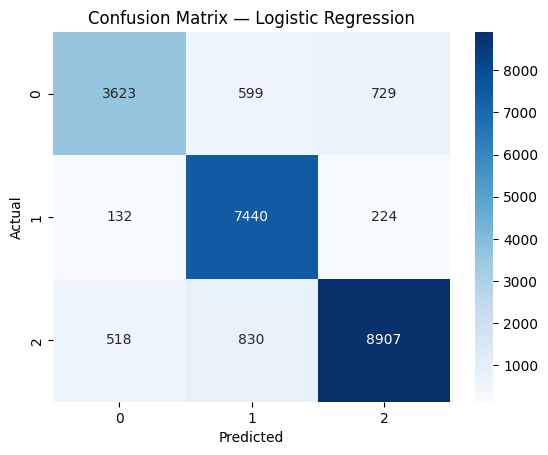

In [ ]:
cm = confusion_matrix(y_test, y_pred_log)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix — Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

11 — Predict Sentiment for New Text

In [ ]:
def predict_sentiment(text):
    cleaned = clean_text(text)
    vectorized = vectorizer.transform([cleaned])
    pred = log_model.predict(vectorized)[0]
    return pred

# Example
sample = "I love this product!"
print("Prediction:", predict_sentiment(sample))

Prediction: 1.0
